# STEREO-HAND-TRACKING

### Import

In [18]:
import random
import numpy as np
from matplotlib import pyplot as plt

import os
import pickle
import cv2
from typing import Any, Tuple

import scipy.io
from tqdm.notebook import tqdm

from src.stereo_matching import StereoMatcher
from src.neural_net import NeuralNet

%matplotlib inline

# For auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Data Loading

In [19]:
def load_dataset(seq):
    import zipfile

    labels_path = os.path.join('data', '%sCounting_BB.mat'% seq)
    img_zip_path = os.path.join('data', '%sCounting.zip'% seq)
    images_path = os.path.join('data', '%s'% seq)

    if not os.path.isfile(img_zip_path):
        print(f'Sequence {seq} is not found')
        return 
    
    if not os.path.isfile(labels_path):
        print(f'Sequence {seq} does not have labels') 
        return
    
    left, right = [], []
    label = scipy.io.loadmat(labels_path)['handPara']
    with zipfile.ZipFile(img_zip_path, 'r') as imgpath:
        for img_name in tqdm(imgpath.infolist(), desc='Extracting %s'%seq):
            if 'left' in img_name.filename:
                data = imgpath.read(img_name)
                left.append(cv2.imdecode(np.frombuffer(data, np.uint8), 3))
            if 'right' in img_name.filename:
                data = imgpath.read(img_name)
                right.append(cv2.imdecode(np.frombuffer(data, np.uint8), 3))
    return (left, right, label)

In [20]:
left, right, label = load_dataset('B1')

Extracting B1:   0%|          | 0/6000 [00:00<?, ?it/s]

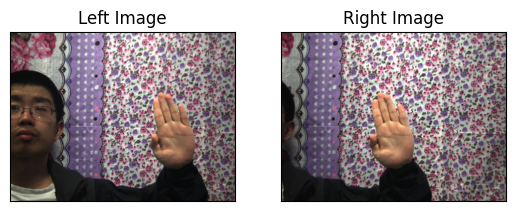

In [21]:
left_im, right_im = left[0], right[0]

fig, axes = plt.subplots(1, 2)
axes[0].imshow(cv2.cvtColor(left_im, cv2.COLOR_BGR2RGB))
axes[0].set_title('Left Image'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(cv2.cvtColor(right_im, cv2.COLOR_BGR2RGB))
axes[1].set_title('Right Image'), axes[1].set_xticks([]), axes[1].set_yticks([]);

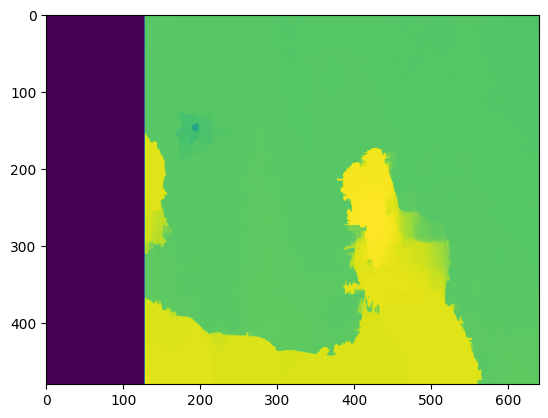

In [27]:
stereo = StereoMatcher(128, 11, 2, 0.5)
disp = stereo.compute_disp_maps(cv2.cvtColor(left_im, cv2.COLOR_BGR2GRAY), cv2.cvtColor(right_im, cv2.COLOR_BGR2GRAY))

plt.figure()
plt.imshow(disp)
plt.show()